# 5 Categorizing and Tagging Words

Natural Language Processing with Python, by Steven Bird, Ewan Klein, and Edward Loper.

O'Reilly Media, 978-0-596-51649-9.

## 1   Using a Tagger

In [1]:
import nltk, re, pprint
from nltk import word_tokenize

In [2]:
text = word_tokenize("And now for something completely different")
print(nltk.pos_tag(text))

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]


In [3]:
text = word_tokenize("Y ahora por algo completamente distinto")
print(nltk.pos_tag(text))

[('Y', 'NNP'), ('ahora', 'VBZ'), ('por', 'JJ'), ('algo', 'NN'), ('completamente', 'NN'), ('distinto', 'NN')]


In [4]:
nltk.help.upenn_tagset('RB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


In [5]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [6]:
nltk.help.upenn_tagset('VBZ')

VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...


In [7]:
nltk.help.upenn_tagset('NN.*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [8]:
nltk.help.upenn_tagset('.*')

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [9]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


## 2   Tagged Corpora

### 2.1   Representing Tagged Tokens

In [10]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [11]:
tagged_token[0]

'fly'

In [12]:
tagged_token[1]

'NN'

In [13]:
sent = '''
... The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
... other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
... Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
... said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
... accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
... interest/NN of/IN both/ABX governments/NNS ''/'' ./.
... '''
print([nltk.tag.str2tuple(t) for t in sent.split()])

[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ('and', 'CC'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('purchasing', 'VBG'), ('departments', 'NNS'), ('which', 'WDT'), ('it', 'PPS'), ('said', 'VBD'), ('``', '``'), ('ARE', 'BER'), ('well', 'QL'), ('operated', 'VBN'), ('and', 'CC'), ('follow', 'VB'), ('generally', 'RB'), ('accepted', 'VBN'), ('practices', 'NNS'), ('which', 'WDT'), ('inure', 'VB'), ('to', 'IN'), ('the', 'AT'), ('best', 'JJT'), ('interest', 'NN'), ('of', 'IN'), ('both', 'ABX'), ('governments', 'NNS'), ("''", "''"), ('.', '.')]


### 2.2   Reading Tagged Corpora

In [14]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [15]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [16]:
print(nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [17]:
nltk.corpus.cess_esp.tagged_words()

[('El', 'da0ms0'), ('grupo', 'ncms000'), ...]

In [18]:
nltk.corpus.cess_cat.tagged_words()

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

### 2.3   A Universal Part-of-Speech Tagset

Universal Part-of-Speech Tagset

**Tag 	 Meaning 	              English Examples**

ADJ 	adjective 	            new, good, high, special, big, local
ADP 	adposition 	            on, of, at, with, by, into, under
ADV 	adverb 	                really, already, still, early, now
CONJ 	conjunction 	        and, or, but, if, while, although
DET 	determiner, article 	the, a, some, most, every, no, which
NOUN 	noun 	                year, home, costs, time, Africa
NUM 	numeral 	            twenty-four, fourth, 1991, 14:24
PRT 	particle 	            at, on, out, over per, that, up, with
PRON 	pronoun 	            he, their, her, its, my, I, us
VERB 	verb 	                is, say, told, given, playing, would
. 	    punctuation marks 	    . , ; !
X 	    other 	                ersatz, esprit, dunno, gr8, univeristy

In [19]:
dir(nltk.corpus)

['AlignedCorpusReader',
 'AlpinoCorpusReader',
 'BNCCorpusReader',
 'BracketParseCorpusReader',
 'CHILDESCorpusReader',
 'CMUDictCorpusReader',
 'CategorizedBracketParseCorpusReader',
 'CategorizedCorpusReader',
 'CategorizedPlaintextCorpusReader',
 'CategorizedSentencesCorpusReader',
 'CategorizedTaggedCorpusReader',
 'ChasenCorpusReader',
 'ChunkedCorpusReader',
 'ComparativeSentencesCorpusReader',
 'ConllChunkCorpusReader',
 'ConllCorpusReader',
 'CorpusReader',
 'CrubadanCorpusReader',
 'DependencyCorpusReader',
 'EuroparlCorpusReader',
 'FramenetCorpusReader',
 'IEERCorpusReader',
 'IPIPANCorpusReader',
 'IndianCorpusReader',
 'KNBCorpusReader',
 'LazyCorpusLoader',
 'LinThesaurusCorpusReader',
 'MTECorpusReader',
 'MWAPPDBCorpusReader',
 'MacMorphoCorpusReader',
 'NKJPCorpusReader',
 'NPSChatCorpusReader',
 'NombankCorpusReader',
 'NonbreakingPrefixesCorpusReader',
 'OpinionLexiconCorpusReader',
 'PPAttachmentCorpusReader',
 'PanLexLiteCorpusReader',
 'PanlexSwadeshCorpusReader',

In [20]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [21]:
from nltk.corpus import cess_esp
cess_esp

<BracketParseCorpusReader in 'C:\\Users\\34677\\AppData\\Roaming\\nltk_data\\corpora\\cess_esp'>

In [22]:
print(nltk.corpus.cess_esp.readme())

CESS-ESP and CESS-CAT TREEBANK

The Universitat de Barcelona (CLiC-UB), the Universidad de Alicante
(UA), the Universitat PolitÃšcnica de Catalunya (UPC), and the Euskal
Herriko Unibertsitatea (EHU-UPV) are the sole and exclusive owners of
the CESS-Esp treebank.  Information for this corpus can be found at:
http://www.lsi.upc.edu/~mbertran/cess-ece2/

The goal of the CESS-ECE project is to create three corpora, one for
Spanish (CESS-ESP), one for Catalan (CESS-Cat) and one for Basque
(CESS-EUS), of 500,000 words for CESS-Esp and CESS-Cat and 350,000
words for the CESS-Eus. These corpora will be tagged in two ways:
syntactically (with constituents and functions for CESS-Esp and
CESS-Cat and with dependencies for CESS-Eus) and semantically (with
WordNet synsets). This project is based on resources from 3LB Project
(FIT 150500-2002-244), where 100,000 words per language were annotated
in the same way.

The version distributed with NLTK are syntactic treebanks (with
constituents and functi

### 2.4   Nouns

In [23]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

In [24]:
word_tag_pairs = nltk.bigrams(cess_esp)
print(word_tag_pairs)

<generator object bigrams at 0x000001F58DEE52C8>


### 2.5   Verbs

In [25]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
print([wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB'])

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would', 'were', 'had', 'been', 'could', "'s", 'can', 'do', 'say', 'make', 'may', 'did', 'rose', 'made', 'does', 'expected', 'buy', 'take', 'get', 'might', 'sell', 'added', 'sold', 'help', 'including', 'should', 'reported', 'according', 'pay', 'compared', 'being', 'fell', 'began', 'based', 'used', 'closed', "'re", 'want', 'see', 'took', 'yield', 'offered', 'set', 'priced', 'approved', 'come', 'noted', 'cut', 'ended', 'found', 'increased', 'become', 'think', 'named', 'go', 'trying', 'proposed', 'received', 'growing', 'declined', 'held', 'give', 'came', 'use', 'put', 'making', 'continue', 'raise', 'estimated', 'called', 'paid', 'designed', 'going', 'expects', 'seeking', 'must', 'plans', 'wo', 'increasing', 'saying', 'got', 'owns', 'trading', 'acquired', 'gained', 'fined', 'reached', 'holding', 'announced', 'filed', 'became', 'seek', 'included', 'using', 'led', 'decided', 'keep', 'disclosed', 'agreed', 'find', 'failed', 'ru

In [26]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [27]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

In [28]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
print(list(cfd2['VBN']))

['named', 'used', 'caused', 'exposed', 'reported', 'replaced', 'sold', 'died', 'expected', 'diagnosed', 'studied', 'industrialized', 'owned', 'found', 'classified', 'rejected', 'outlawed', 'imported', 'tracked', 'thought', 'considered', 'elected', 'based', 'lifted', 'ensnarled', 'voted', 'been', 'held', 'banned', 'renovated', 'prolonged', 'recorded', 'accumulated', 'offered', 'become', 'guaranteed', 'proposed', 'related', 'improved', 'worried', 'cluttered', 'expedited', 'retired', 'ordered', 'collected', 'required', 'received', 'moved', 'determined', 'made', 'changed', 'completed', 'disputed', 'refunded', 'estimated', 'compared', 'located', 'filed', 'scrapped', 'anticipated', 'priced', 'set', 'applied', 'existed', 'incurred', 'reached', 'Regarded', 'paid', 'trained', 'instituted', 'vowed', 'deemed', 'combined', 'removed', 'concerned', 'complained', 'accelerated', 'believed', 'called', 'solved', 'forgiven', 'launched', 'built', 'preferred', 'raised', 'scheduled', 'brought', 'increased',

In [29]:
print([w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]])

[]


In [30]:
idx1 = wsj.index(('kicked', 'VBD'))
wsj[idx1-4:idx1+1]

[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

In [31]:
idx2 = wsj.index(('kicked', 'VBN'))
wsj[idx2-4:idx2+1]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

### 2.6   Adjectives and Adverbs

### 2.7   Unsimplified Tags

In [32]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

### 2.8   Exploring Tagged Corpora

In [33]:
brown_learned_text = brown.words(categories='learned')
print(sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often')))

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming', 'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', 'classified', 'colorful', 'composed', 'contain', 'differed', 'difficult', 'encountered', 'enough', 'equate', 'extremely', 'found', 'happens', 'have', 'ignored', 'in', 'involved', 'more', 'needed', 'nightly', 'observed', 'of', 'on', 'out', 'quite', 'represent', 'responsible', 'revamped', 'seclude', 'set', 'shortened', 'sing', 'sounded', 'stated', 'still', 'sung', 'supported', 'than', 'to', 'when', 'work']


In [34]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [35]:
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3) 

for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

tried to get
learn to live
helping to move
striving to hold
choose to work
tried to see
trying to create
made to appear
failed to make
seemed to deserve
managed to mix
want to hurt
liked to nip
manages to acquire
widened to enchant
serve to contradict
dare to experiment
tried to humanize
tries to preserve
helps to rebut
seems to make
began to play
cares to remember
serve to show
want to collect
designed to invite
attempt to make
designed to belong
seem to come
wanted to identify
neglect to cultivate
chooses to lead
chosen to sing
expected to follow
formed to spur
tends to shy
seeking to become
tries to make
began to change
try to solve
formed to fill
determined to avoid
seems to work
began to fall
began to depart
refused to give
like to sniff
continue to demonstrate
begins to wilt
going to murder
trying to puzzle
expects to profit
chooses to die
wishes to pay
conditioned to expect
hoped to tell
refusing to make
intended to stop
failed to lead
need to discipline
attempts to trace
conspi

seeking to help
interpreted to conform
explored to find
trying to throw
designed to find
required to mark
asked to consider
seem to involve
seems to smell
seems to see
learned to develop
arranged to meet
need to work
want to raise
need to bring
expect to grow
expected to work
want to include
going to produce
want to hire
want to buy
want to hire
going to farm
need to know
want to undertake
want to buy
wish to locate
plan to sell
want to go
intend to raise
cost to live
expected to produce
expect to get
forced to lay
trying to explain
happened to light
began to turn
intended to warn
used to transform
forced to overcome
begins to give
failed to post
refused to permit
encouraged to beget
obliged to obey
united to push
try to oppose
made to impose
wanted to clarify
proposed to sail
determined to catch
forced to turn
seemed to sense
seemed to know
tried to brush
turning to repeat
tried to persuade
wanted to turn
preparing to pacify
forced to retreat
contracted to supply
forced to leave
offer

asked to yield
made to look
begun to lose
failed to learn
wanted to take
writing to devote
vowed to kneel
hoping to lift
forced to seek
continue to urge
prepared to assist
hope to make
continue to maintain
scheduled to go
taken to program
begun to probe
attempting to present
instructed to burn
attempted to conclude
equipped to handle
trying to check
mean to write
wished to pursue
refused to attend
decided to dance
failed to amaze
continued to search
threatening to swallow
pleased to see
tried to discover
disturbed to find
failed to realize
manage to get
wanted to buy
decided to bypass
allowed to preach
allowed to pass
dared to drop
expected to move
means to ridicule
hesitate to sacrifice
forced to move
taken to effect
hoped to imprint
tailored to fit
obliged to describe
tried to block
chosen to edit
plotted to take
tried to halt
wanted to die
returned to make
like to believe
bother to look
used to go
seemed to thaw
came to give
wanted to see
used to look
meant to help
like to straighte

required to file
required to file
elect to use
required to file
obligated to furnish
trained to read
made to assure
tend to create
rejoicing to remember
permitted to run
came to work
decided to bring
found to permit
helping to strengthen
began to ship
believed to provide
designed to provide
expect to make
developed to facilitate
set to hold
continuing to carry
designed to increase
improved to obtain
purchased to permit
extended to provide
sought to meet
designed to handle
invited to participate
planned to provide
inclined to advance
aims to give
wish to pursue
expected to increase
expected to exceed
begun to make
continues to expand
began to make
need to learn
learn to delegate
working to attain
begun to translate
besieged to serve
help to create
assumed to originate
used to describe
expected to cause
taken to study
required to ensure
used to measure
used to start
started to strike
allowed to pull
used to measure
generalized to include
eliminated to obtain
extended to include
used to d

comes to represent
used to accompany
seems to symbolize
begins to appear
begins to ramble
help to set
calculated to put
decided to write
seemed to open
combine to create
learned to use
began to take
wanted to tell
wanted to substitute
want to make
come to determine
begun to ebb
intended to incorporate
led to postulate
hope to discover
tended to emphasize
fails to explore
seeks to make
helping to define
trying to avoid
trying to get
made to symbolize
kneels to kiss
serve to travesty
used to equate
altered to show
altered to show
taken to branch
attempt to execute
used to name
used to name
used to generate
used to select
used to select
used to specify
used to specify
expected to serve
used to eliminate
designed to handle
made to take
tended to float
began to decrease
began to build
used to provide
tend to ensure
seems to strive
stated to emphasize
channeled to produce
expected to replace
developed to attack
needed to translate
needed to make
used to deny
required to localize
found to pro

want to make
got to hold
want to inquire
seemed to spend
preoccupied to cook
asked to speak
pacing to stare
wished to make
began to build
needed to carry
meaning to live
agreed to help
agreed to take
contract to let
refused to believe
meant to invade
going to turn
got to intercept
permitted to go
failed to anticipate
needed to make
use to make
help to repel
seems to shield
pretending to sleep
threatening to report
seem to concentrate
want to give
trying to pull
adjusted to operate
like to see
bent to observe
forced to accompany
fear to tread
programed to compute
remember to program
directed to develop
schooled to examine
appeared to require
encouraged to develop
remembered to introduce
guided to make
tried to run
tried to tell
tried to ask
want to ask
going to come
going to happen
going to happen
going to take
inclined to think
manage to follow
wanting to tell
tried to write
exhausted to stay
afford to lose
afford to pay
used to work
going to give
began to rock
tried to call
stoop to c

began to aid
going to tear
like to exhibit
forced to make
hate to admit
got to decide
tried to sell
try to swing
expect to call
paused to get
proceeded to search
began to suspect
endeavoring to cut
wanted to know
daring to commit
given to dig
urged to attend
refused to receive
beckoned to cross
taken to keep
trying to hold
managing to get
promised to illustrate
pretending to black
wanted to remind
Resolving to get
started to start
starting to woolgather
bound to get
wanted to keep
looked to see
chosen to complement
live to hear
leaping to light
trying to prove
trying to determine
supposed to put
proceeded to neglect
care to count
shuddered to think
telephoned to announce
neglected to consider
trouble to memorize
deigned to appear
seemed to understand
try to revive
seemed to produce
returning to jump
tried to farm
going to set
turned to stare
seem to think
liked to hire
remember to telephone
like to work
like to disclose
got to put
got to run
waiting to get
need to worry
seems to think


In [36]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


## 3 Mapping words to properties using Python dictionaries

### 3.1 Indexing lists vs dictionaries

### 3.2   Dictionaries in Python

### 3.3   Defining Dictionaries

### 3.4   Default Dictionaries

### 3.5   Incrementally Updating a Dictionary

### 3.6   Complex Keys and Values

### 3.7   Inverting a Dictionary

Python's Dictionary Methods: A summary of commonly-used methods and idioms involving dictionaries.

Example 	                             Description
d = {} 	                        create an empty dictionary and assign it to d
d[key] = value 	                assign a value to a given dictionary key
d.keys() 	                    the list of keys of the dictionary
list(d) 	                    the list of keys of the dictionary
sorted(d) 	                    the keys of the dictionary, sorted
key in d 	                    test whether a particular key is in the dictionary
for key in d 	                iterate over the keys of the dictionary
d.values() 	                    the list of values in the dictionary
dict([(k1,v1), (k2,v2), ...]) 	create a dictionary from a list of key-value pairs
d1.update(d2) 	                add all items from d2 to d1
defaultdict(int) 	            a dictionary whose default value is zero

## 4   Automatic Tagging

In [2]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

### 4.1   The Default Tagger

In [3]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [6]:
print(nltk.FreqDist(tags))

<FreqDist with 218 samples and 100554 outcomes>


In [7]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [8]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

### 4.2   The Regular Expression Tagger

In [9]:
patterns = [
...     (r'.*ing$', 'VBG'),                # gerunds
...     (r'.*ed$', 'VBD'),                 # simple past
...     (r'.*es$', 'VBZ'),                 # 3rd singular present
...     (r'.*ould$', 'MD'),                # modals
...     (r'.*\'s$', 'NN$'),                # possessive nouns
...     (r'.*s$', 'NNS'),                  # plural nouns
...     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
...     (r'.*', 'NN')                      # nouns (default)
... ]

In [10]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [11]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20186168625812995

### 4.3   The Lookup Tagger

In [12]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [13]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [14]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))

In [15]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

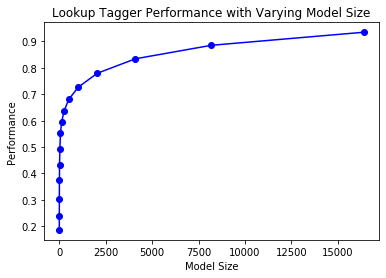

In [16]:
display()

### 4.4   Evaluation

## 5   N-Gram Tagging

### 5.1   Unigram Tagging

In [17]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [18]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

In [19]:
from nltk.corpus import cess_esp

In [20]:
cess_tagged_sents = cess_esp.tagged_sents()

In [22]:
cess_sents = cess_esp.sents()

In [23]:
unigram_tagger = nltk.UnigramTagger(cess_tagged_sents)
unigram_tagger.tag(cess_sents[2007])

[('En', 'sps00'),
 ('el', 'da0ms0'),
 ('equipo', 'ncms000'),
 ('perdedor', 'ncms000'),
 ('fue', 'vsis3s0'),
 ('expulsado', 'vmp00sm'),
 ('el', 'da0ms0'),
 ('jugador', 'ncms000'),
 ('Ricardo_Viveros', 'np0000p'),
 (',', 'Fc'),
 ('a', 'sps00'),
 ('los', 'da0mp0'),
 ('60', 'Z'),
 ('minutos', 'ncmp000'),
 (',', 'Fc'),
 ('por', 'sps00'),
 ('jugada', 'ncfs000'),
 ('violenta', 'aq0fs0'),
 ('.', 'Fp')]

In [24]:
unigram_tagger.evaluate(cess_tagged_sents)

0.9573760282326076

### 5.2   Separating the Training and Testing Data

In [28]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [26]:
size = int(len(cess_tagged_sents) * 0.9)
size

5427

In [29]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

In [30]:
train_sents = cess_tagged_sents[:size]
test_sents = cess_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.7986414850946325

### 5.3   General N-Gram Tagging

In [31]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', None),
 ('of', None),
 ('the', None),
 ('apartments', None),
 ('are', None),
 ('of', None),
 ('the', None),
 ('terrace', None),
 ('type', None),
 (',', None),
 ('being', None),
 ('on', None),
 ('the', None),
 ('ground', None),
 ('floor', None),
 ('so', None),
 ('that', None),
 ('entrance', None),
 ('is', None),
 ('direct', None),
 ('.', None)]

In [32]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', None),
 ('population', None),
 ('of', None),
 ('the', None),
 ('Congo', None),
 ('is', None),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [33]:
bigram_tagger.evaluate(test_sents)

0.09549916352568884

In [34]:
bigram_tagger.evaluate(test_sents)

0.09549916352568884

### 5.4   Combining Taggers

In [35]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8097877572410457

In [36]:
t3 = nltk.TrigramTagger(train_sents, backoff=t2)
t3.evaluate(test_sents)

0.8098885372785358

### 5.5   Tagging Unknown Words

### 5.6   Storing Taggers

In [37]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [38]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [39]:
text = """The board's action shows what free enterprise is up against in our complex maze of regulatory laws ."""
tagger.tag(text.split())

[('The', 'NN'),
 ("board's", 'NN'),
 ('action', 'NN'),
 ('shows', 'NN'),
 ('what', 'NN'),
 ('free', 'NN'),
 ('enterprise', 'NN'),
 ('is', 'NN'),
 ('up', 'NN'),
 ('against', 'NN'),
 ('in', 'NN'),
 ('our', 'NN'),
 ('complex', 'NN'),
 ('maze', 'NN'),
 ('of', 'NN'),
 ('regulatory', 'NN'),
 ('laws', 'NN'),
 ('.', 'Fp')]

In [ ]:
text = """The board's action shows what free enterprise is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

### 5.7   Performance Limitations

In [ ]:
cfd = nltk.ConditionalFreqDist(
...            ((x[1], y[1], z[0]), z[1])
...            for sent in brown_tagged_sents
...            for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

In [ ]:
test_tags = [tag for sent in brown.sents(categories='editorial')
...                  for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags, test_tags)) 

## 6   Transformation-Based Tagging

## 7   How to Determine the Category of a Word

### 7.1   Morphological Clues